# Import Libraries

In [1]:
import pathlib
import sys
import os
import platform

#from time import time
#import scipy

import requests

import pandas as pd
import numpy as np
import geopandas as gpd
import contextily as cx

import seaborn as sns

import time
import datetime

import statsmodels.api as sm

import logging

from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import matplotlib
import matplotlib as mpl
import matplotlib.cm as cm
%matplotlib inline

In [2]:
print("Operating System " + platform.system() + " " + platform.release())
print("Python Version " + str(sys.version))
print("Pandas Version " + str(pd.__version__))
print("Numpy Version " + str(np.__version__))
print("Matplotlib Version " + str(mpl.__version__))
#print("Well Application Version " + str(wa.__version__))
#print("Scipy Version " +str(scipy.__version__))
print (os.environ['CONDA_DEFAULT_ENV'])

Operating System Windows 10
Python Version 3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:50:54) [MSC v.1934 64 bit (AMD64)]
Pandas Version 2.0.1
Numpy Version 1.24.3
Matplotlib Version 3.7.1
pygis311new


# Set file paths

In [3]:
gis_path = pathlib.Path("G:/Shared drives/UGS_Groundwater/Projects/Eddy_Covariance/GIS")
main_path = gis_path / "Cottonwood"
figure_dir = main_path / "figures"
raw_dir = main_path / "Cottonwood_Zonal"
save_place = main_path / "output"
#G:\Shared drives\UGS_Groundwater\Projects\Pahvant_Valley\Pahvant_Basins\GEE_out
#save_place = "GEE_Summary_Out"
#ctnpath = gis_path / "Cottonwood"
dlypath = main_path / "openet_daily_data"
timepath = main_path / "openet_data"

# Read in GIS with OpenET Data

In [4]:
all_data_irr_yr_gis = gpd.read_file(gis_path / 'POU_w_data_all_irr_yr_ind7.shp')
all_data_irr_yr_gis['sens_yr'] = all_data_irr_yr_gis[['sensor','year']].apply(lambda x: f"{x[0]}-{x[1]}",1)
all_data_irr_yr_gis['ft_applied'] = all_data_irr_yr_gis['total_acft']/all_data_irr_yr_gis['acres']
all_data_irr_yr_gis['ft_eff_ppt'] = all_data_irr_yr_gis['ens_eet']/all_data_irr_yr_gis['acres']


In [5]:
all_data_irr_yr_gis

,sensor,index,Meternumbe,irr_area,fld_comnt,ft_from_cr,ft_city_se,SoilClass,AWC,avg_elev,...,eem_residu,sse_residu,ens_res_no,eem_res_no,ens_rsid_o,eem_rsid_o,geometry,sens_yr,ft_applied,ft_eff_ppt
0,BC1,0,BC1,Blue Cut,looks fallowed in hex,578.857846,1354.277446,C,18.12,5698.56,...,61.895734,61.895734,0.741048,0.727390,76.156952,74.753302,"POLYGON Z ((-12360754.266 4752285.955 0.000, -...",BC1-2016,0.973054,0.232006
1,BC1,1,BC1,Blue Cut,looks fallowed in hex,578.857846,1354.277446,C,18.12,5698.56,...,52.573373,52.573373,0.614439,0.617835,68.795269,69.175491,"POLYGON Z ((-12360754.266 4752285.955 0.000, -...",BC1-2017,0.893141,0.278702
2,BC1,2,BC1,Blue Cut,looks fallowed in hex,578.857846,1354.277446,C,18.12,5698.56,...,87.330941,87.330941,1.007212,1.026301,79.431536,80.936924,"POLYGON Z ((-12360754.266 4752285.955 0.000, -...",BC1-2018,1.268026,0.260813
3,BC1,3,BC1,Blue Cut,looks fallowed in hex,578.857846,1354.277446,C,18.12,5698.56,...,83.573035,83.573035,0.997910,0.982139,80.184222,78.916936,"POLYGON Z ((-12360754.266 4752285.955 0.000, -...",BC1-2019,1.244522,0.246612
4,BC1,4,BC1,Blue Cut,looks fallowed in hex,578.857846,1354.277446,C,18.12,5698.56,...,92.646370,92.646370,1.116503,1.088767,78.388196,76.440899,"POLYGON Z ((-12360754.266 4752285.955 0.000, -...",BC1-2020,1.424326,0.307822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,UM8,866,UM8,Upper Mammoth,all along the boundary,231.230650,1198.836649,B,21.54,5894.29,...,55.946259,55.946259,0.138342,0.106074,38.708259,29.679713,MULTIPOLYGON Z (((-12365217.550 4757009.255 0....,UM8-2018,0.357396,0.219054
867,UM8,867,UM8,Upper Mammoth,all along the boundary,231.230650,1198.836649,B,21.54,5894.29,...,88.985328,88.985328,0.220469,0.168716,46.568394,35.636896,MULTIPOLYGON Z (((-12365217.550 4757009.255 0....,UM8-2019,0.473431,0.252962
868,UM8,868,UM8,Upper Mammoth,all along the boundary,231.230650,1198.836649,B,21.54,5894.29,...,52.573940,52.573940,0.178788,0.099680,38.223630,21.310880,MULTIPOLYGON Z (((-12365217.550 4757009.255 0....,UM8-2020,0.467743,0.288955
869,UM8,869,UM8,Upper Mammoth,all along the boundary,231.230650,1198.836649,B,21.54,5894.29,...,67.679781,67.679781,0.176528,0.128321,45.572948,33.127646,MULTIPOLYGON Z (((-12365217.550 4757009.255 0....,UM8-2021,0.387353,0.210825


# Read in Gage Comparison Data

In [6]:
comparison = pd.read_csv(main_path / 'gage_reading_comparison.csv')
comparison['residual'] = comparison['total_acft'] - comparison['gpm_total_acft']

In [7]:
comparison

,Unnamed: 0,year,gpm_total_acft,total_acft,residual
0,BC1,2015,0.000000,48.9,48.900000
1,BC1,2016,82.825413,82.8,-0.025413
2,BC1,2017,73.779676,76.0,2.220324
3,BC1,2018,104.721728,107.9,3.178272
4,BC1,2019,110.703118,105.9,-4.803118
...,...,...,...,...,...
896,UM9,2018,6.738362,6.6,-0.138362
897,UM9,2019,15.737329,15.7,-0.037329
898,UM9,2020,19.375253,19.0,-0.375253
899,UM9,2021,13.995611,14.0,0.004389


In [8]:
comparison['sens_yr'] = comparison[['Unnamed: 0','year']].apply(lambda x: f"{x[0]}-{x[1]}",1)#['residual']
comparison

,Unnamed: 0,year,gpm_total_acft,total_acft,residual,sens_yr
0,BC1,2015,0.000000,48.9,48.900000,BC1-2015
1,BC1,2016,82.825413,82.8,-0.025413,BC1-2016
2,BC1,2017,73.779676,76.0,2.220324,BC1-2017
3,BC1,2018,104.721728,107.9,3.178272,BC1-2018
4,BC1,2019,110.703118,105.9,-4.803118,BC1-2019
...,...,...,...,...,...,...
896,UM9,2018,6.738362,6.6,-0.138362,UM9-2018
897,UM9,2019,15.737329,15.7,-0.037329,UM9-2019
898,UM9,2020,19.375253,19.0,-0.375253,UM9-2020
899,UM9,2021,13.995611,14.0,0.004389,UM9-2021


In [9]:
geo_w_err = pd.merge(all_data_irr_yr_gis,comparison[['total_acft','residual','gpm_total_acft','sens_yr']], on='sens_yr',how='left')

In [10]:
geo_w_err.to_file(gis_path / 'POU_w_data_all_irr_yr_w_err.shp')
geo_w_err.to_file(gis_path / 'POU_w_data_all_irr_yr_w_err.gpkg', driver="GPKG")

C:\Users\pauli\AppData\Local\Temp\ipykernel_12816\985351346.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  geo_w_err.to_file(gis_path / 'POU_w_data_all_irr_yr_w_err.shp')


Subset gage data to values where the difference is less than 10 ac-ft

In [11]:
low_err = comparison[(comparison['residual'].abs()<10)&(comparison['total_acft'] > 0)].rename(columns={'Unnamed: 0':'sensor'})
low_err['sens_yr'] = low_err[['sensor','year']].apply(lambda x: f"{x[0]}-{x[1]}",1)
low_err_sensors = low_err['sens_yr'].unique()

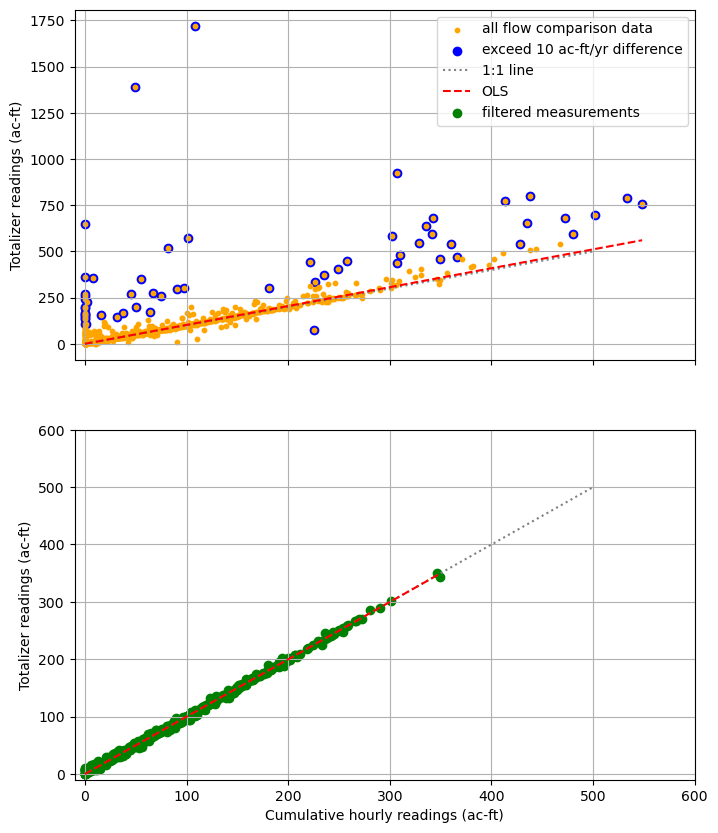

In [12]:

#comp_filtered = comparison[comparison['total_acft']<750]


df = comparison.sort_values('gpm_total_acft').dropna()
#define predictor and response variables
x = df['gpm_total_acft']
y = df['total_acft']

#add constant to predictor variables
X = sm.add_constant(x)

#fit linear regression model
res = sm.RLM(y, X).fit()
#predictions = res.get_prediction()


comp_out = comparison[comparison['residual'].abs() > 100]
comparison['gpm_total_acft']


df1 = low_err.sort_values('gpm_total_acft').dropna()
#define predictor and response variables
x1 = df1['gpm_total_acft']
y1 = df1['total_acft']

#add constant to predictor variables
X1 = sm.add_constant(x1)

#fit linear regression model
res1 = sm.RLM(y1, X1).fit()
#predictions = res.get_prediction()

fig, ax = plt.subplots(2,1,figsize=(8,10),sharex=True)

ax[0].scatter(x,y,color='orange',s=10,label='all flow comparison data')

ax[0].scatter(comp_out['gpm_total_acft'],comp_out['total_acft'],zorder=0,color='blue',label='exceed 10 ac-ft/yr difference')

linx = range(0,500)
ax[0].plot(linx,linx,color='grey',linestyle=":",label='1:1 line')
ax[1].plot(linx,linx,color='grey',linestyle=":",label='1:1 line')
ax[0].plot(x, res.fittedvalues, 'r--', label="OLS")
ax[0].scatter(None,None,zorder=0,color='green',label='filtered measurements')

ax[0].grid()
ax[1].grid()
ax[1].scatter(low_err['gpm_total_acft'],low_err['total_acft'],zorder=0,color='green',label='filtered measurements')
ax[1].set_ylim(-10,600)
ax[0].set_xlim(-10,600)
ax[1].plot(x1, res1.fittedvalues, 'r--', label="OLS")
ax[1].set_xlabel('Cumulative hourly readings (ac-ft)')
ax[0].set_ylabel('Totalizer readings (ac-ft)')
ax[1].set_ylabel('Totalizer readings (ac-ft)')
ax[0].legend()

plt.savefig(figure_dir / 'gage_data_comparison.png')
plt.savefig(figure_dir / 'gage_data_comparison.pdf')

In [13]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:             total_acft   No. Observations:                  901
Model:                            RLM   Df Residuals:                      899
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 May 2023                                         
Time:                        20:20:41                                         
No. Iterations:                    50                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0647      0.267      0.243      0.808      -0.458       0.587
gpm_total_acft     1.0224      0.002    498.127      0.000       1.018       1.026
==================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [14]:
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:             total_acft   No. Observations:                  650
Model:                            RLM   Df Residuals:                      648
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 May 2023                                         
Time:                        20:20:41                                         
No. Iterations:                    22                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0510      0.030      1.688      0.091      -0.008       0.110
gpm_total_acft     0.9992      0.000   3296.486      0.000       0.999       1.000
==================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

Bland-Altman Plot 

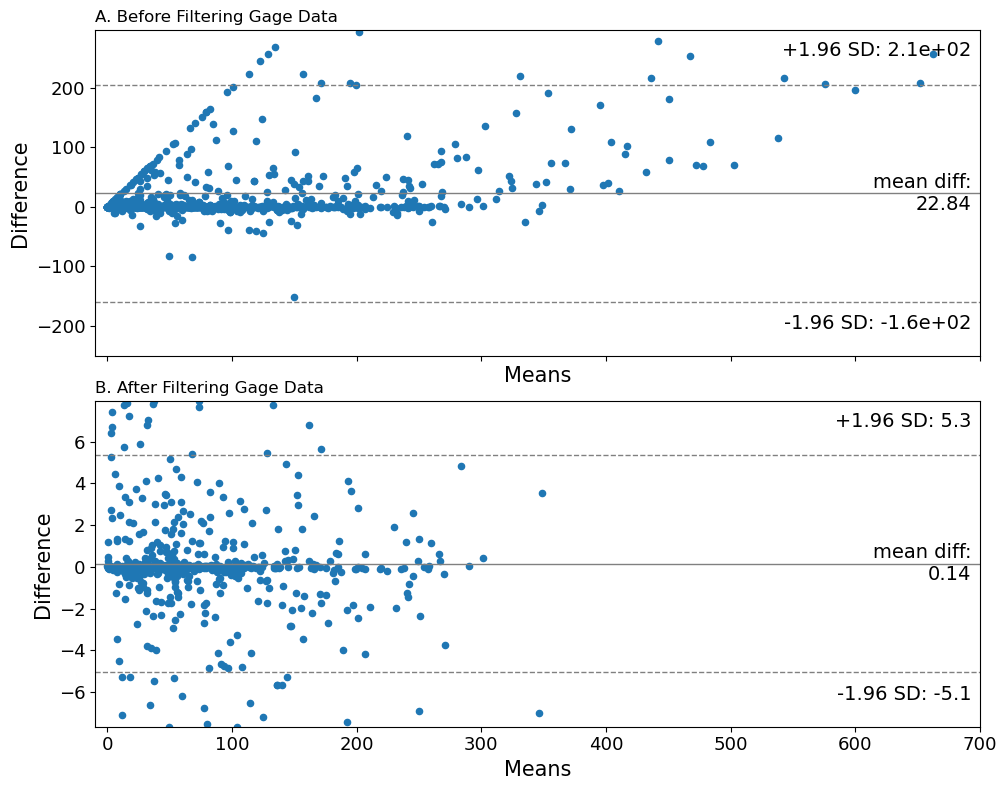

In [15]:
fig, ax = plt.subplots(2, 1, figsize=(10,8), sharex=True)

comp_no_zero = comparison[comparison['gpm_total_acft'] > 0]

sm.graphics.mean_diff_plot(comparison['total_acft'], comparison['gpm_total_acft'], ax=ax[0])
ax[0].set_title('A. Before Filtering Gage Data',loc='left')

sm.graphics.mean_diff_plot(low_err['total_acft'], low_err['gpm_total_acft'], ax=ax[1])
ax[1].set_title('B. After Filtering Gage Data',loc='left')

plt.xlim(-10,700)

plt.savefig(figure_dir / 'bland_altman_gage_lowerr.png')
plt.savefig(figure_dir / 'bland_altman_gage_lowerr.pdf')

In [16]:
all_data_irr_yr_gis['comment'].unique()

array(['nan', 'seems high', 'this year is weird', 'Beyond 11/11',
       'weird numbers', 'continued past 10/31', 'Ended 11/3',
       'Ended after 11/1', 'Sus?', '2016-09-22 00:00:00',
       '2017-10-08 00:00:00', '2019-10-04 00:00:00',
       '2020-09-28 00:00:00', 'last day 9/20/21', '2020-11-24 00:00:00',
       '2017-12-21 00:00:00', '2018-12-21 00:00:00',
       '2019-12-21 00:00:00', '2017-08-27 00:00:00',
       'only flow on 8/29 - sus; maybe should be 0',
       '2020-07-11 00:00:00', 'or 33.7 - in July - sus; reset 7/26',
       '2016-12-15 00:00:00', '2017-12-02 00:00:00',
       '2023-10-31 00:00:00', '2017-09-11 00:00:00'], dtype=object)

# Subset OpenET Data

## Subset by low meter error

In [17]:
outl_out = all_data_irr_yr_gis[all_data_irr_yr_gis['sens_yr'].isin(low_err_sensors)]

In [18]:
outl_out.columns

Index(['sensor', 'index', 'Meternumbe', 'irr_area', 'fld_comnt', 'ft_from_cr',
       'ft_city_se', 'SoilClass', 'AWC', 'avg_elev', 'irr_type', 'year',
       'PML_Soil_E', 'PML_Veg_Tr', 'PML_Veg_In', 'pml_aet', 'terra_aet',
       'terra_def', 'terra_ppt', 'terra_ro', 'terra_soil', 'terra_swe',
       'daymet_ppt', 'daymet_swe', 'openet_aet', 'gpm_ppt', 'prism_ppt',
       'Subsurface', 'SurfaceSM', 'sse_et', 'ens_etof', 'ens_eto', 'ens_et',
       'ens_pr', 'eem_et', 'acres', 'Peff', 'total_acft', 'page_num',
       'comment', 'eem_eet', 'sse_eet', 'ens_eet', 'ens_residu', 'eem_residu',
       'sse_residu', 'ens_res_no', 'eem_res_no', 'ens_rsid_o', 'eem_rsid_o',
       'geometry', 'sens_yr', 'ft_applied', 'ft_eff_ppt'],
      dtype='object')

C:\Users\pauli\AppData\Local\Temp\ipykernel_12816\522472115.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdYlBu')
C:\Users\pauli\anaconda3\envs\pygis311new\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


0.7812719355424056 6.5082586254841015
0.7812719355424056 6.5082586254841015
0.6776964074216962
83.61387014993643
-64.50782117312917


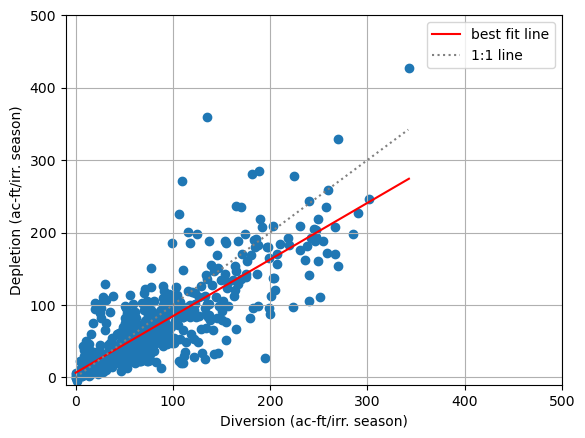

In [19]:
yvar = 'eem_eet'
xvar = 'total_acft'
cvar = 'Subsurface'

df = outl_out.sort_values(xvar)#.dropna()
#df[xvar] = df[xvar]/df['acres']
#df[yvar] = df[yvar]/df['acres']
#df[cvar] = df[cvar]/df['acres']
#define predictor and response variables
y = df[yvar]
x = df[xvar]

#add constant to predictor variables
X = sm.add_constant(x)

#fit linear regression model
fitlinet = sm.OLS(y, X).fit()
predictionst = fitlinet.get_prediction()

w = df[cvar]
cmap = plt.cm.get_cmap('RdYlBu')
norm = mpl.colors.Normalize(vmin=w.min(), vmax=w.max())
m = cm.ScalarMappable(norm=norm, cmap=cmap)
m.set_array(w)
sc = plt.scatter(x, y, label='',) #color = m.to_rgba(w))

#plt.scatter(x,y,c=df[cvar])
plt.plot(df[xvar],df[xvar]*fitlinet.params[1] + fitlinet.params[0], label='best fit line',color='red')

mx = int(round(df[xvar].max(),0))
plt.plot(range(0,mx),range(0,mx),color='grey',linestyle=":",label="1:1 line")

print(fitlinet.params[1], fitlinet.params[0])
print(fitlinet.params[1], fitlinet.params[0])
print(fitlinet.rsquared)
print(np.quantile(fitlinet.resid,0.975))
print(np.quantile(fitlinet.resid,0.0275))
outl_out['lin_resid'] = fitlinet.resid.values
plt.grid()
plt.xlabel('Diversion (ac-ft/irr. season)')
plt.ylabel('Depletion (ac-ft/irr. season)')
plt.xlim(-10,500)
plt.ylim(-10,500)
#cbar = plt.colorbar(m)
plt.legend()
#cbar.set_label('SMAP Soil Moisture (ac-ft)')
plt.savefig(figure_dir / 'diversion_vs_depletion_filtered.png')
plt.savefig(figure_dir / 'diversion_vs_depletion_filtered.pdf')


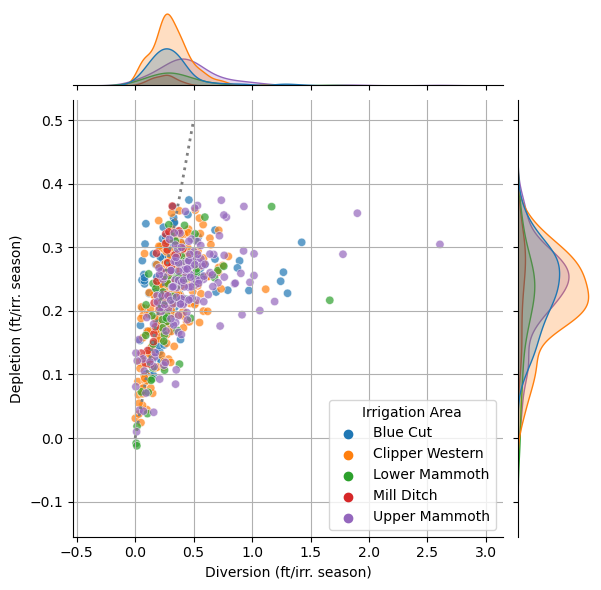

In [20]:
datadf= outl_out.rename(columns={'ft_applied':'Diversion (ft/irr. season)',
                                 'ft_eff_ppt':'Depletion (ft/irr. season)','irr_area':'Irrigation Area'})

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data= datadf,
    x='Diversion (ft/irr. season)', y='Depletion (ft/irr. season)', hue='Irrigation Area',alpha=0.7)
g.ax_joint.plot(np.arange(0,0.6,0.1),np.arange(0,0.6,0.1), color='grey',linestyle=':', linewidth = 2, label='1:1 line')
g.ax_joint.grid()

#g.ax_joint.text(150,400, "More ET than Diversion")
#g.ax_joint.text(205,30, "More Diversion than ET")


sns.move_legend(g.ax_joint, "lower right")
plt.savefig(figure_dir / 'diversion_vs_depletion_by_ft_area_filtered.png')
plt.savefig(figure_dir / 'diversion_vs_depletion_by_ft_area_filtered.pdf')

In [21]:
outl_out[outl_out['ft_applied']>1]

,sensor,index,Meternumbe,irr_area,fld_comnt,ft_from_cr,ft_city_se,SoilClass,AWC,avg_elev,...,sse_residu,ens_res_no,eem_res_no,ens_rsid_o,eem_rsid_o,geometry,sens_yr,ft_applied,ft_eff_ppt,lin_resid
2,BC1,2,BC1,Blue Cut,looks fallowed in hex,578.857846,1354.277446,C,18.12,5698.56,...,87.330941,1.007212,1.026301,79.431536,80.936924,"POLYGON Z ((-12360754.266 4752285.955 0.000, -...",BC1-2018,1.268026,0.260813,-0.111358
3,BC1,3,BC1,Blue Cut,looks fallowed in hex,578.857846,1354.277446,C,18.12,5698.56,...,83.573035,0.997910,0.982139,80.184222,78.916936,"POLYGON Z ((-12360754.266 4752285.955 0.000, -...",BC1-2019,1.244522,0.246612,-5.867299
4,BC1,4,BC1,Blue Cut,looks fallowed in hex,578.857846,1354.277446,C,18.12,5698.56,...,92.646370,1.116503,1.088767,78.388196,76.440899,"POLYGON Z ((-12360754.266 4752285.955 0.000, -...",BC1-2020,1.424326,0.307822,-8.511834
5,BC1,5,BC1,Blue Cut,looks fallowed in hex,578.857846,1354.277446,C,18.12,5698.56,...,90.737818,1.075557,1.066338,82.526845,81.819493,"POLYGON Z ((-12360754.266 4752285.955 0.000, -...",BC1-2021,1.303281,0.227724,-8.529170
231,CW1B,231,CW1B,Clipper Western,NaN,4797.921134,492.227325,B,22.65,5890.29,...,20.956360,0.882456,0.835647,79.036622,74.844144,"POLYGON Z ((-12364453.833 4754713.196 0.000, -...",CW1B-2019,1.116516,0.234059,-9.269703
615,LM6,615,LM6,Lower Mammoth,uniform,5089.354046,0.000000,B,14.69,5765.03,...,74.495973,1.447735,1.418672,86.981789,85.235667,"POLYGON Z ((-12357876.049 4753069.570 0.000, -...",LM6-2018,1.664411,0.216677,17.295357
626,LM8,626,LM8,Lower Mammoth,NaN,6234.418409,832.350758,C,18.37,5768.84,...,38.988626,0.803251,0.737556,68.819059,63.190642,"POLYGON Z ((-12357545.091 4753161.659 0.000, -...",LM8-2020,1.167192,0.363942,-9.536394
701,UM14,701,UM14,Upper Mammoth,NaN,130.100024,216.475750,B,22.80,5820.72,...,107.713344,1.488225,1.438322,83.734408,80.926629,"POLYGON Z ((-12363735.319 4756297.319 0.000, -...",UM14-2018,1.777316,0.289091,87.206086
702,UM14,702,UM14,Upper Mammoth,NaN,130.100024,216.475750,B,22.80,5820.72,...,167.971595,2.301973,2.242965,88.314832,86.051022,"POLYGON Z ((-12363735.319 4756297.319 0.000, -...",UM14-2019,2.606553,0.304580,1.406405
703,UM14,703,UM14,Upper Mammoth,NaN,130.100024,216.475750,B,22.80,5820.72,...,109.432561,1.546550,1.461279,81.390266,76.902713,"POLYGON Z ((-12363735.319 4756297.319 0.000, -...",UM14-2020,1.900166,0.353616,-38.414262


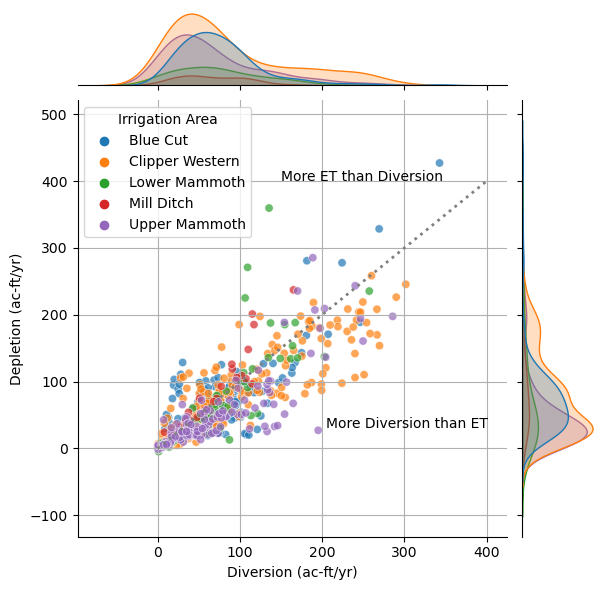

In [22]:
datadf= outl_out.rename(columns={'total_acft':'Diversion (ac-ft/yr)',
                                 'eem_eet':'Depletion (ac-ft/yr)','irr_area':'Irrigation Area'})

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data= datadf,
    x='Diversion (ac-ft/yr)', y='Depletion (ac-ft/yr)', hue='Irrigation Area',alpha=0.7)
g.ax_joint.plot(range(0,400),range(0,400), color='grey',linestyle=':', linewidth = 2, label='1:1 line')
g.ax_joint.grid()

g.ax_joint.text(150,400, "More ET than Diversion")
g.ax_joint.text(205,30, "More Diversion than ET")

sns.move_legend(g.ax_joint, "upper left")
plt.savefig(figure_dir / 'diversion_vs_depletion_by_area_filtered.png')
plt.savefig(figure_dir / 'diversion_vs_depletion_by_area_filtered.pdf')

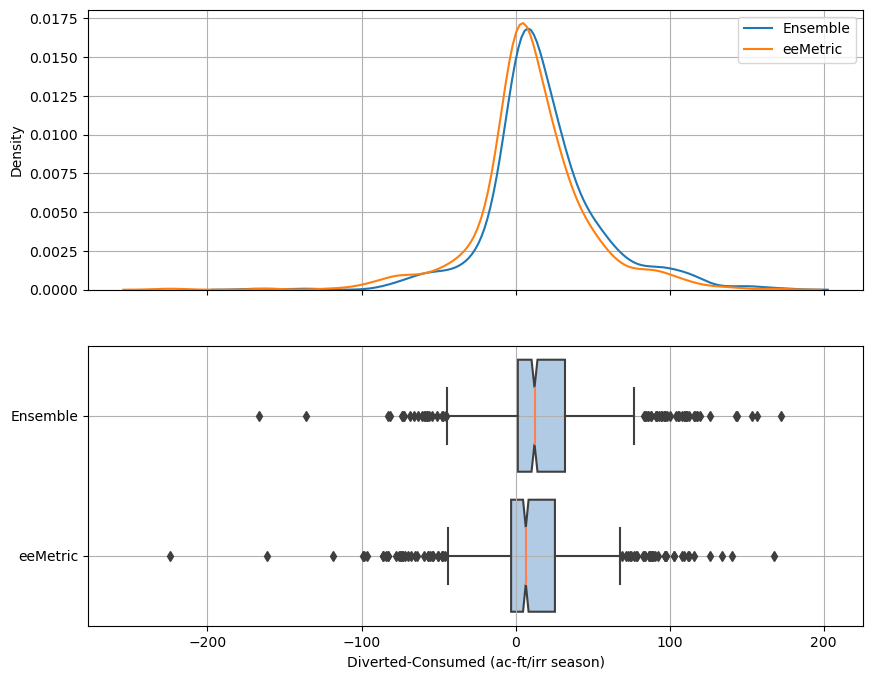

In [23]:
fig, ax = plt.subplots(2,1,sharex=True,figsize=(10,8))

sns.kdeplot(data = outl_out, x="ens_residu",ax=ax[0],label='Ensemble')

sns.kdeplot(data = outl_out, x="eem_residu",ax=ax[0],label='eeMetric')

sns.boxplot(data = outl_out[["ens_residu","eem_residu"]].rename(columns={"ens_residu":'Ensemble',
                                                                             "eem_residu":'eeMetric'}), 
            orient='h',notch=True,    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
 )
ax[0].legend()
plt.xlabel("Diverted-Consumed (ac-ft/irr season)")
ax[0].grid()
ax[1].grid()
plt.savefig(figure_dir / 'residual_diversion_minus_depletion_bymodel_filtered.png')
plt.savefig(figure_dir / 'residual_diversion_minus_depletion_bymodel_filtered.png')

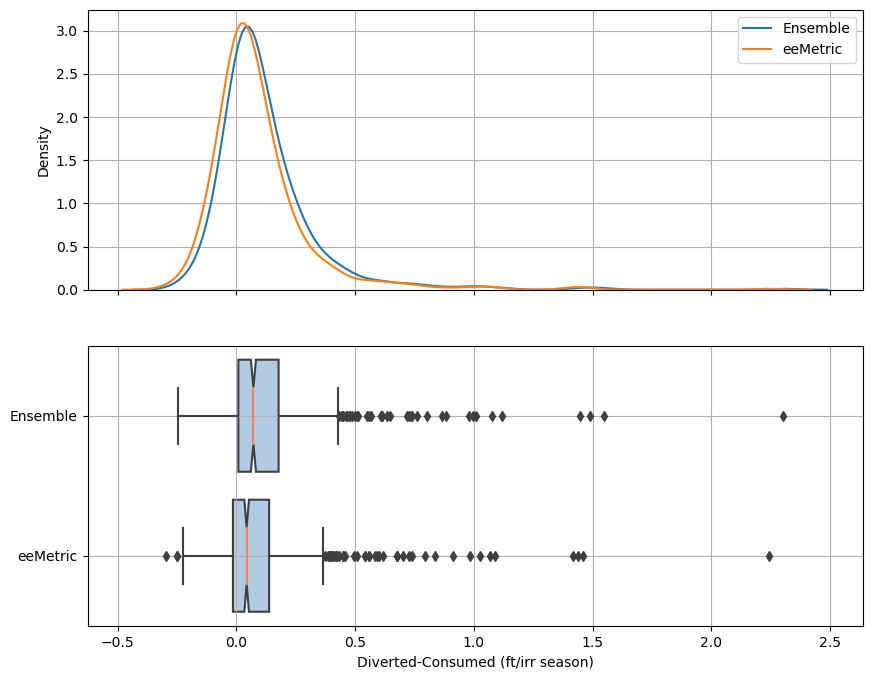

In [24]:
fig, ax = plt.subplots(2,1,sharex=True,figsize=(10,8))

sns.kdeplot(data = outl_out, x='ens_res_no',ax=ax[0],label='Ensemble')

sns.kdeplot(data = outl_out, x='eem_res_no',ax=ax[0],label='eeMetric')

sns.boxplot(data = outl_out[['ens_res_no','eem_res_no']].rename(columns={'ens_res_no':'Ensemble',
                                                                             'eem_res_no':'eeMetric'}), 
            orient='h',notch=True,    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
 )
ax[0].legend()
plt.xlabel("Diverted-Consumed (ft/irr season)")
ax[0].grid()
ax[1].grid()

plt.savefig(figure_dir / 'residual_diversion_minus_depletion_bymodel_ft_filtered.png')
plt.savefig(figure_dir / 'residual_diversion_minus_depletion_bymodel_ft_filtered.png')

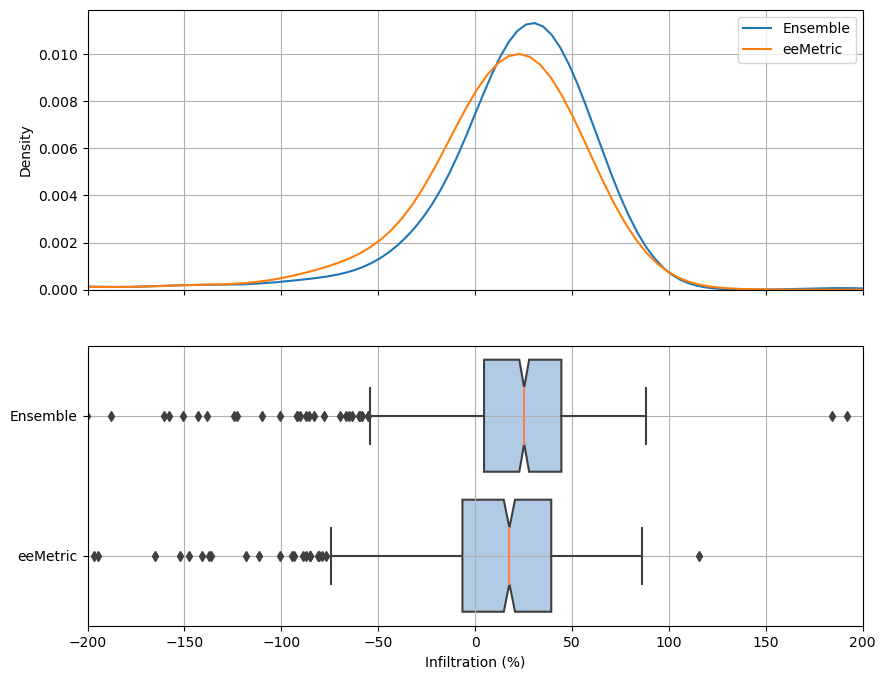

In [25]:
fig, ax = plt.subplots(2,1,sharex=True,figsize=(10,8))


subst = outl_out[(outl_out['ens_rsid_o'].abs()<1000)&(outl_out['eem_rsid_o'].abs()<1000)][['ens_rsid_o','eem_rsid_o']]

sns.kdeplot(data = subst, x='ens_rsid_o',ax=ax[0],label='Ensemble')

sns.kdeplot(data = subst, x='eem_rsid_o',ax=ax[0],label='eeMetric')

sns.boxplot(data = subst[['ens_rsid_o','eem_rsid_o']].rename(columns={'ens_rsid_o':'Ensemble',
                                                                             'eem_rsid_o':'eeMetric'}), 
            orient='h',notch=True,    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
 )
ax[0].legend()
ax[1].set_xlabel("Infiltration (%)")
ax[0].grid()
ax[1].grid()
ax[1].set_xlim(-200,200)
plt.savefig(figure_dir / 'residual_diversion_minus_depletion_bymodel_filtered.png')
plt.savefig(figure_dir / 'residual_diversion_minus_depletion_bymodel_filtered.png')

In [26]:
subst[['ens_rsid_o','eem_rsid_o']].describe()

,ens_rsid_o,eem_rsid_o
count,612.000000,612.000000
mean,12.416284,4.445377
std,66.461505,75.028731
min,-577.768359,-479.344632
25%,4.623456,-6.536548
50%,25.342757,17.703260
75%,44.525554,39.300230
max,192.196139,486.449517


## Subset By uniform Fields

In [27]:
uniform = all_data_irr_yr_gis[all_data_irr_yr_gis['fld_comnt']=='uniform']#[all_data_irr_yr_gis['ens_residual'].abs() > 500]

In [28]:
uniform

,sensor,index,Meternumbe,irr_area,fld_comnt,ft_from_cr,ft_city_se,SoilClass,AWC,avg_elev,...,eem_residu,sse_residu,ens_res_no,eem_res_no,ens_rsid_o,eem_rsid_o,geometry,sens_yr,ft_applied,ft_eff_ppt
99,BC29,99,BC29,Blue Cut,uniform,3966.395927,8088.961865,C,17.17,5569.93,...,12.882390,12.882390,0.091217,0.024986,20.745272,5.682572,"POLYGON Z ((-12356005.666 4749072.655 0.000, -...",BC29-2020,0.439702,0.348485
100,BC29,100,BC29,Blue Cut,uniform,3966.395927,8088.961865,C,17.17,5569.93,...,11.628150,11.628150,0.066230,0.022554,18.886407,6.431499,"POLYGON Z ((-12356005.666 4749072.655 0.000, -...",BC29-2021,0.350675,0.284445
101,BC29,101,BC29,Blue Cut,uniform,3966.395927,8088.961865,C,17.17,5569.93,...,36.412941,36.412941,0.097541,0.070626,24.259554,17.565336,"POLYGON Z ((-12356005.666 4749072.655 0.000, -...",BC29-2022,0.402074,0.304533
137,BC35,137,BC35,Blue Cut,uniform,239.687214,6814.479986,C,17.65,5569.97,...,-1.591146,-1.591146,0.029729,-0.008545,12.784897,-3.674702,"POLYGON Z ((-12355503.978 4750267.787 0.000, -...",BC35-2016,0.232532,0.202803
138,BC35,138,BC35,Blue Cut,uniform,239.687214,6814.479986,C,17.65,5569.97,...,-3.224201,-3.224201,-0.000767,-0.017315,-0.238464,-5.382640,"POLYGON Z ((-12355503.978 4750267.787 0.000, -...",BC35-2017,0.321678,0.322445
139,BC35,139,BC35,Blue Cut,uniform,239.687214,6814.479986,C,17.65,5569.97,...,-13.019273,-13.019273,-0.038524,-0.069917,-14.821484,-26.899324,"POLYGON Z ((-12355503.978 4750267.787 0.000, -...",BC35-2018,0.259920,0.298444
140,BC35,140,BC35,Blue Cut,uniform,239.687214,6814.479986,C,17.65,5569.97,...,-2.629781,-2.629781,0.042505,-0.014123,12.047124,-4.002711,"POLYGON Z ((-12355503.978 4750267.787 0.000, -...",BC35-2019,0.352825,0.310320
141,BC35,141,BC35,Blue Cut,uniform,239.687214,6814.479986,C,17.65,5569.97,...,-20.875263,-20.875263,-0.040848,-0.112105,-12.656160,-34.734214,"POLYGON Z ((-12355503.978 4750267.787 0.000, -...",BC35-2020,0.322752,0.363600
142,BC35,142,BC35,Blue Cut,uniform,239.687214,6814.479986,C,17.65,5569.97,...,-4.579534,-4.579534,0.032838,-0.024593,10.364208,-7.761922,"POLYGON Z ((-12355503.978 4750267.787 0.000, -...",BC35-2021,0.316844,0.284006
143,BC35,143,BC35,Blue Cut,uniform,239.687214,6814.479986,C,17.65,5569.97,...,-17.333217,-17.333217,-0.065381,-0.093084,-27.359000,-38.951050,"POLYGON Z ((-12355503.978 4750267.787 0.000, -...",BC35-2022,0.238976,0.304357


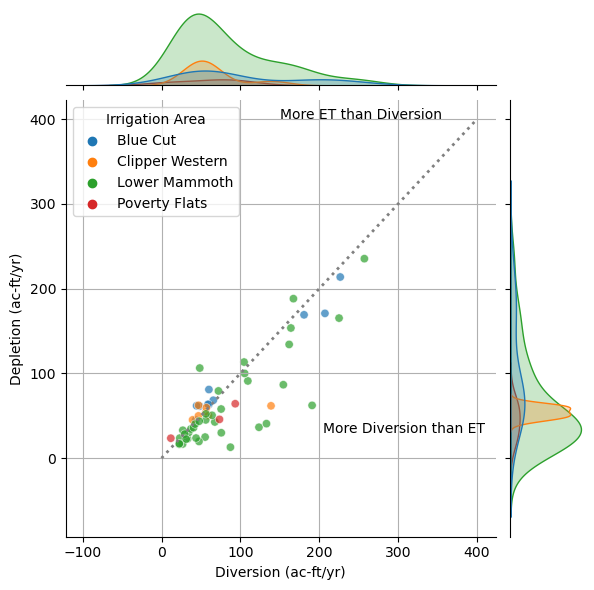

In [29]:
datadf= uniform.rename(columns={'total_acft':'Diversion (ac-ft/yr)',
                                 'eem_eet':'Depletion (ac-ft/yr)','irr_area':'Irrigation Area'})

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data= datadf,
    x='Diversion (ac-ft/yr)', y='Depletion (ac-ft/yr)', hue='Irrigation Area',alpha=0.7)
g.ax_joint.plot(range(0,400),range(0,400), color='grey',linestyle=':', linewidth = 2, label='1:1 line')
g.ax_joint.grid()

g.ax_joint.text(150,400, "More ET than Diversion")
g.ax_joint.text(205,30, "More Diversion than ET")

sns.move_legend(g.ax_joint, "upper left")
#plt.savefig(figure_dir / 'diversion_vs_depletion_by_area_filtered.png')
#plt.savefig(figure_dir / 'diversion_vs_depletion_by_area_filtered.pdf')

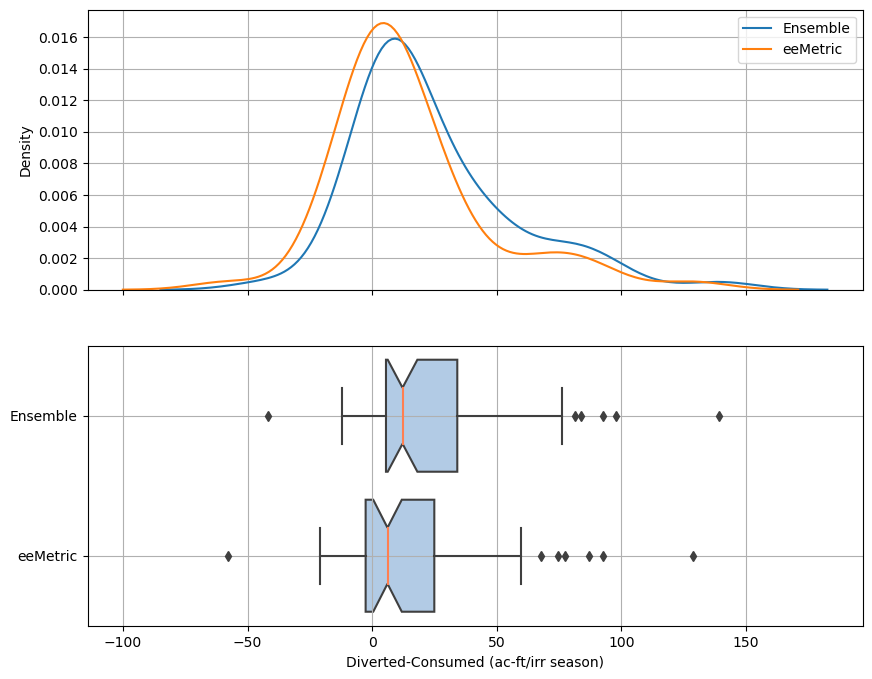

In [30]:
fig, ax = plt.subplots(2,1,sharex=True,figsize=(10,8))

sns.kdeplot(data = uniform, x="ens_residu",ax=ax[0],label='Ensemble')

sns.kdeplot(data = uniform, x="eem_residu",ax=ax[0],label='eeMetric')

sns.boxplot(data = uniform[["ens_residu","eem_residu"]].rename(columns={"ens_residu":'Ensemble',
                                                                             "eem_residu":'eeMetric'}), 
            orient='h',notch=True,    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
 )
ax[0].legend()
plt.xlabel("Diverted-Consumed (ac-ft/irr season)")
ax[0].grid()
ax[1].grid()